In [1]:
from defect_dataset import DefectDataset
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # PIL -> Tensor and [0,255] -> [0,1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # *We are not normalizing to our dataset's actual mean and stdev here*
])

train_dir = '/projectnb/npbssmic/ac25/Defect_Classification/unsupervised_dataset/train'  
train_dataset = DefectDataset(image_dir=train_dir, transform=transform)

val_dir = '/projectnb/npbssmic/ac25/Defect_Classification/unsupervised_dataset/val' 
val_dataset = DefectDataset(image_dir=val_dir, transform=transform)

In [3]:
#Load saved model 
import torch
from cae import ConvAutoencoder

model_path = '/projectnb/npbssmic/ac25/Defect_Classification/logs/train2/model.pt'
autoencoder = ConvAutoencoder(input_size=48, input_channels=3, feature_dim=128)
autoencoder.load_state_dict(torch.load(model_path, map_location='cpu'))
autoencoder.eval()

ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=2304, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=2304, bias=True)
    (1): ReLU(inplace=True)
    (2): Unflatten(dim=1, unflattened_size=(256, 3, 3))
    (3): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (6): ReLU(inpl

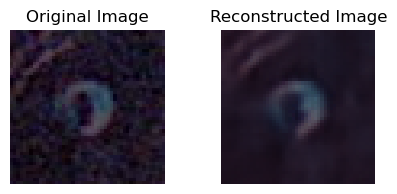

In [51]:
#Show results on a random validation image

import matplotlib.pyplot as plt
import random

example = train_dataset.__getitem__(random.randint(0, len(val_dataset) - 1))

example_np = example.numpy().transpose(1,2,0)
example_np = ((example_np * 0.5) + 0.5) * 255
example_np = example_np.astype('uint8')

example = torch.unsqueeze(example, 0)

with torch.no_grad():
    result = autoencoder(example)
    result = result[0].numpy().transpose(1,2,0)
    result =  ((result * 0.5) + 0.5) * 255
    result = result.astype('uint8')

# Plot the original and reconstructed images side by side
fig, axs = plt.subplots(1, 2, figsize=(5, 2))

# Original image
axs[0].imshow(example_np)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Reconstructed image
axs[1].imshow(result)
axs[1].set_title('Reconstructed Image')
axs[1].axis('off')

# Show the plot
plt.show()